#Punto 1
La regresión logística es uno de los métodos de aprendizaje automático que se utiliza para resolver problemas de clasificación binaria de una manera muy eficiente. Identifica una situación real (centro laboral, negocio, hogar) de la cual puedas adquirir una cantidad considerable de datos y que represente una problemática de clasificación binaria, por ejemplo: (0/1), (si/no), (continuar/detener), entre otras. Elabora un programa en Python donde, a partir del análisis previo del comportamiento de los datos, puedas elaborar un modelo capaz de predecir el resultado adecuado para nuevas condiciones que se pudieran presentar.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
df = pd.read_csv('Rewards.csv')

In [5]:
df.shape

(150, 8)

In [6]:
df.head(5)

,Gender,Age,Membership,Loyalty Points,Discount,Gift,Earlybird,Reward
0,Male,45,Premium,501 to 1000,Yes,Yes,Yes,Cashback
1,Female,41,Normal,Below 500,No,No,No,Coupon
2,Female,25,Premium,Above 1000,Yes,Yes,Yes,Coupon or Cashback
3,Male,38,Premium,501 to 1000,Yes,Yes,Yes,Cashback
4,Male,32,Normal,Above 1000,Yes,Yes,No,Coupon or Cashback


In [7]:
X = pd.DataFrame(df,columns=['Gender','Age','Membership','Loyalty Points','Discount','Gift','Earlybird'])
y = pd.DataFrame(df,columns=['Reward'])

In [8]:
X.rename(columns={'Loyalty Points':'Loyalty_Points'},inplace=True)

In [9]:
X.head()

,Gender,Age,Membership,Loyalty_Points,Discount,Gift,Earlybird
0,Male,45,Premium,501 to 1000,Yes,Yes,Yes
1,Female,41,Normal,Below 500,No,No,No
2,Female,25,Premium,Above 1000,Yes,Yes,Yes
3,Male,38,Premium,501 to 1000,Yes,Yes,Yes
4,Male,32,Normal,Above 1000,Yes,Yes,No


In [10]:
y.head()

,Reward
0,Cashback
1,Coupon
2,Coupon or Cashback
3,Cashback
4,Coupon or Cashback


In [11]:
for i in X:
  X[i].values
  print(X[i].values)

['Male' 'Female' 'Female' 'Male' 'Male' 'Male' 'Female' 'Female' 'Female'
 'Female' 'Female' 'Male' 'Female' 'Male' 'Female' 'Male' 'Female'
 'Female' 'Male' 'Female' 'Male' 'Female' 'Female' 'Female' 'Female'
 'Male' 'Female' 'Female' 'Male' 'Female' 'Male' 'Female' 'Female'
 'Female' 'Male' 'Male' 'Male' 'Female' 'Female' 'Female' 'Female'
 'Female' 'Male' 'Male' 'Female' 'Female' 'Male' 'Female' 'Female'
 'Female' 'Female' 'Female' 'Male' 'Male' 'Female' 'Female' 'Male'
 'Female' 'Female' 'Male' 'Female' 'Male' 'Male' 'Female' 'Female'
 'Female' 'Female' 'Male' 'Female' 'Male' 'Male' 'Female' 'Female'
 'Female' 'Male' 'Female' 'Male' 'Female' 'Male' 'Female' 'Female'
 'Female' 'Female' 'Male' 'Female' 'Male' 'Female' 'Female' 'Female'
 'Female' 'Female' 'Male' 'Female' 'Female' 'Male' 'Male' 'Male' 'Female'
 'Female' 'Female' 'Male' 'Male' 'Female' 'Female' 'Female' 'Male'
 'Female' 'Female' 'Male' 'Male' 'Female' 'Male' 'Female' 'Female'
 'Female' 'Male' 'Female' 'Female' 'Female' 

In [12]:
for i in y:
  y[i].values
  print(y[i].values)

['Cashback' 'Coupon' 'Coupon or Cashback' 'Cashback' 'Coupon or Cashback'
 'Cashback' 'Coupon' 'Coupon' 'Coupon or Cashback' 'Cashback'
 'Coupon or Cashback' 'Coupon' 'Cashback' 'Coupon or Cashback' 'Coupon'
 'Cashback' 'Coupon or Cashback' 'Coupon' 'Coupon or Cashback' 'Coupon'
 'Coupon or Cashback' 'Coupon or Cashback' 'Cashback' 'Coupon or Cashback'
 'Cashback' 'Coupon' 'Coupon or Cashback' 'Cashback' 'Coupon or Cashback'
 'Cashback' 'Coupon' 'Cashback' 'Coupon or Cashback' 'Coupon'
 'Coupon or Cashback' 'Coupon or Cashback' 'Coupon' 'Cashback'
 'Coupon or Cashback' 'Coupon' 'Coupon or Cashback' 'Coupon' 'Coupon'
 'Coupon' 'Coupon' 'Cashback' 'Coupon' 'Coupon' 'Coupon or Cashback'
 'Coupon or Cashback' 'Coupon' 'Coupon or Cashback' 'Coupon' 'Coupon'
 'Coupon' 'Coupon or Cashback' 'Coupon' 'Coupon' 'Cashback' 'Coupon'
 'Coupon' 'Coupon' 'Coupon or Cashback' 'Coupon or Cashback' 'Cashback'
 'Coupon' 'Coupon' 'Coupon or Cashback' 'Coupon or Cashback' 'Coupon'
 'Coupon' 'Cashback' 'Coup

In [13]:
X.head()

,Gender,Age,Membership,Loyalty_Points,Discount,Gift,Earlybird
0,Male,45,Premium,501 to 1000,Yes,Yes,Yes
1,Female,41,Normal,Below 500,No,No,No
2,Female,25,Premium,Above 1000,Yes,Yes,Yes
3,Male,38,Premium,501 to 1000,Yes,Yes,Yes
4,Male,32,Normal,Above 1000,Yes,Yes,No


In [14]:
X.loc[X.Gender=='Male','Gender']=1
X.loc[X.Gender=='Female','Gender']=0

X.loc[X.Membership=='Premium','Membership']=1
X.loc[X.Membership=='Normal','Membership']=0

X.loc[X.Loyalty_Points=='501 to 1000','Loyalty_Points']=1
X.loc[X.Loyalty_Points=='Below 500','Loyalty_Points']=0
X.loc[X.Loyalty_Points=='Above 1000','Loyalty_Points']=2

X.loc[X.Discount=='Yes','Discount']=1
X.loc[X.Discount=='No','Discount']=0

X.loc[X.Gift=='Yes','Gift']=1
X.loc[X.Gift=='No','Gift']=0

X.loc[X.Earlybird=='Yes','Earlybird']=0
X.loc[X.Earlybird=='No','Earlybird']=0

y.loc[y.Reward=='Cashback','Reward']=0
y.loc[y.Reward=='Coupon','Reward']=1
y.loc[y.Reward=='Coupon or Cashback','Reward']=1

In [15]:
X.head()

,Gender,Age,Membership,Loyalty_Points,Discount,Gift,Earlybird
0,1,45,1,1,1,1,0
1,0,41,0,0,0,0,0
2,0,25,1,2,1,1,0
3,1,38,1,1,1,1,0
4,1,32,0,2,1,1,0


In [16]:
y.head()

,Reward
0,0
1,1
2,1
3,0
4,1


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


In [18]:
muestras = X.to_numpy()
tipos = y.values.ravel()

In [19]:
muestras

array([[1, 45, 1, ..., 1, 1, 0],
       [0, 41, 0, ..., 0, 0, 0],
       [0, 25, 1, ..., 1, 1, 0],
       ...,
       [1, 24, 1, ..., 1, 1, 0],
       [0, 42, 0, ..., 0, 0, 0],
       [1, 43, 0, ..., 0, 0, 0]], dtype=object)

In [20]:
tipos

array([0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1], dtype=object)

In [21]:
tipos=tipos.astype('int')

In [22]:
tipos

array([0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1])

In [23]:
X_train, X_test, y_train, y_test = train_test_split(muestras,tipos, train_size = 0.8 )

In [24]:
modelo_reglog = LogisticRegression()

In [25]:
modelo_entrenado = modelo_reglog.fit(X_train, y_train)

In [26]:
#Preguntar para que sirve 
modelo_entrenado.coef_

array([[ 0.56582927, -0.07889872, -1.96807066,  1.37895498, -0.55800286,
        -3.09412624,  0.        ]])

#Punto 2
Investiga sobre las diferentes métricas que se utilizan para evaluar el desempeño de un modelo de aprendizaje automático y desarrolla una metodología que te permita extender ese análisis a cualquier tipo de solución elaborada. Aplica este procedimiento al modelo elaborado en la pregunta 1 y registra tus conclusiones en un documento electrónico de la actividad.

[Fuente investigacion](https://www.datasource.ai/es/data-science-articles/metricas-de-evaluacion-de-modelos-en-el-aprendizaje-automatico)

**Métricas de evaluación del modelo**

Definamos ahora las métricas de evaluación para valorar el rendimiento de un modelo de aprendizaje automático, que es un componente integral de cualquier proyecto de ciencia de los datos. Su objetivo es estimar la precisión de la generalización de un modelo sobre los datos futuros (no vistos/fuera de muestra)

**Matriz de confusión**

Una matriz de confusión es una representación matricial de los resultados de las predicciones de cualquier prueba binaria que se utiliza a menudo para describir el rendimiento del modelo de clasificación (o "clasificador") sobre un conjunto de datos de prueba cuyos valores reales se conocen.



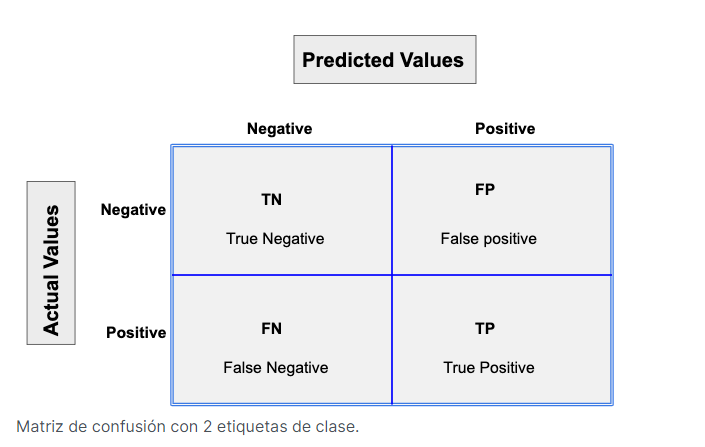


Cada predicción puede ser uno de cuatro resultados, basado en cómo coincide con el valor real:
* Verdadero Positivo (TP): Predicho Verdadero y Verdadero en realidad.
* Verdadero Negativo (TN): Predicho Falso y Falso en realidad.
* Falso Positivo (FP): Predicción de verdadero y falso en la realidad.
* Falso Negativo (FN): Predicción de falso y verdadero en la realidad.





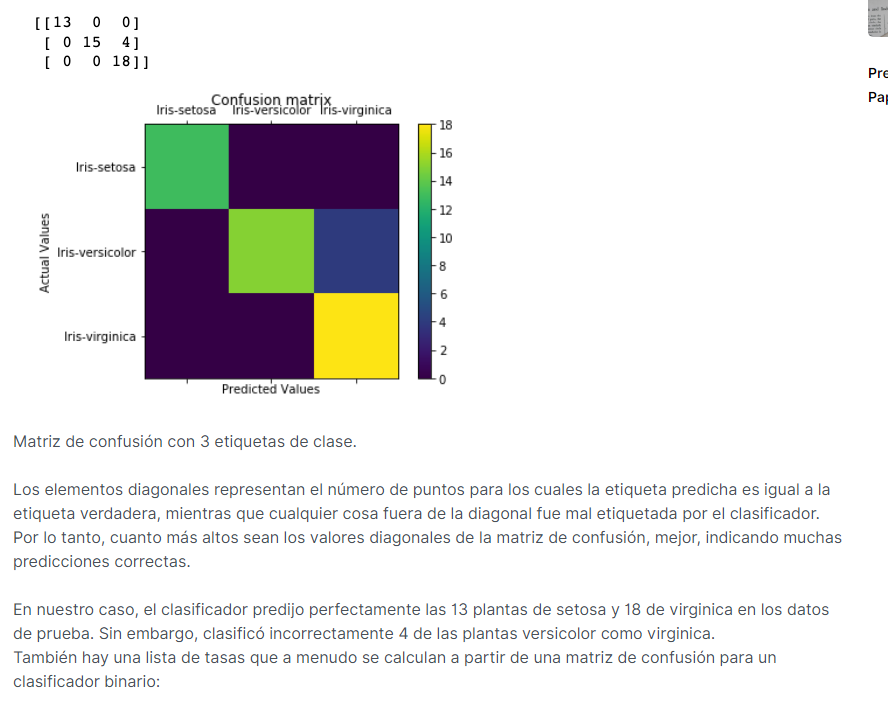

**Exactitud**

En general, ¿con qué frecuencia es correcto el clasificador?

Exactitud = (TP+TN)/total

Cuando nuestras clases son aproximadamente iguales en tamaño, podemos usar la precisión, que nos dará valores clasificados correctamente.

**Precisión**
Cuando predice sí, ¿con qué frecuencia es correcto?

Precisión=TP/predicciones sí

**Exhaustividad**

Cuando en realidad es un sí, ¿con qué frecuencia predice un sí?

Tasa positiva verdadera = TP/Si reales

La Exhaustividad nos da la tasa positiva verdadera (TPR), que es la proporción de los verdaderos positivos a todo lo positivo.

In [27]:
y_pred = modelo_entrenado.predict(X_test)

In [28]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

In [29]:
cnf_matrix

array([[ 1,  1],
       [ 3, 25]])

Text(0.5, 257.44, 'Valor Predecido')

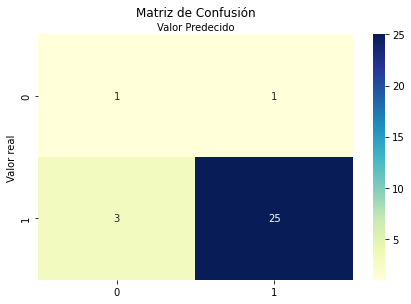

In [30]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(6, 4))
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu",fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Matriz de Confusión', y=1.1)
plt.ylabel('Valor real')
plt.xlabel('Valor Predecido')

In [31]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.8666666666666667
Precision: 0.9615384615384616
Recall: 0.8928571428571429


#Punto 3

Analiza nuevamente la problemática identificada en la pregunta 1 y responde estas preguntas:
¿Se puede resolver mediante un modelo de árbol de decisión?
¿Consideras posible extender el análisis inicial, a una situación donde pudieran estar involucradas nuevas variables de salida? ¿Cómo lo harías?
Partiendo de las respuestas que obtuviste después de realizar el análisis, elabora un nuevo modelo en Python que solucione la problemática con las nuevas condiciones, pero en esta ocasión utiliza el modelo de árbol de decisión que mejor se adecúe a estas.


1.   El problema del punto numero si se puedo realizar con mediante un arbol de decision de tipo clasificatorio pues cumple con las condiciones 

2. es este caso de uso no es puede extender a mas variable de salida pero no dudo que en otro problemas no se pueda realziar 



In [32]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [33]:
arbol_decision = DecisionTreeClassifier(random_state=0)

In [34]:
# X1 = pd.DataFrame(df,columns=['Gender','Age','Membership','Loyalty Points','Discount','Gift','Earlybird'])
# y1 = pd.DataFrame(df,columns=['Reward'])

In [35]:
modelo=arbol_decision.fit(muestras, tipos)

In [36]:
muestra= [[1,0,1,0,1,1,1]]
modelo.predict(muestra)

array([1])